In [8]:
!pip install google-cloud-storage
!pip install pandas

In [9]:
import torch.utils.data
import numpy as np
import matplotlib.pyplot as plt
import torch.utils.data
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils
from pathlib import Path
from google.cloud import storage

'''
Code taken partially from DCGAN tutorial
https://pytorch.org/tutorials/beginner/dcgan_faces_tutorial.html
'''


'\nCode taken partially from DCGAN tutorial\nhttps://pytorch.org/tutorials/beginner/dcgan_faces_tutorial.html\n'

In [31]:
#copy data from GCP buckets to local 
dataroot = Path('/tmp/dataset/') 


# Neural Net Hyperparams
options = {}
options['dataroot'] = str(dataroot) #location of training data
options['batch_size'] = 128  # Batch size during training
options['workers'] = 2       # Number of workers for dataloader
options['image_size'] = 64   # Training images. All images will be resized to this size using a transformer.
options['nc'] = 3     # Number of channels in the training images. Color = 3
options['nz'] = 100   # Size of z latent vector (i.e. size of generator input)
options['ngf'] = 64 # Size of feature maps in generator
options['ndf'] = 64 # Size of feature maps in discriminator
options['num_epochs'] = 5 # training loops
options['lr'] = .0002 # Learning rate for optimizers
options['beta1']  = 0.5  # Beta1 hyperparam for Adam optimizers
options['ngpu'] = 1 # Number of GPUs available. Use 0 for CPU mode.

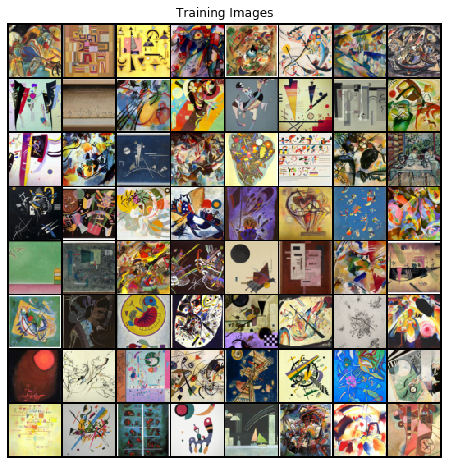

In [32]:
# We can use an image folder dataset the way we have it setup.
# Create the dataset using training images from WikiArt on Kandinsky paintings
dataset = dset.ImageFolder(root=dataroot,
                           transform=transforms.Compose([
                               transforms.Resize(options['image_size']),
                               transforms.CenterCrop(options['image_size']),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                           ]))

# Create the dataloader
dataloader = torch.utils.data.DataLoader(dataset, batch_size=options['batch_size'],
                                         shuffle=True, num_workers=options['workers'])

# Decide which device we want to run on
device = torch.device("cuda:0" if (torch.cuda.is_available() and options['ngpu'] > 0) else "cpu")

# Plot some training images
real_batch = next(iter(dataloader))
plt.figure(figsize=(8,8))
plt.axis("off")
plt.title("Training Images")
plt.imshow(np.transpose(vutils.make_grid(real_batch[0].to(device)[:64], padding=2, normalize=True).cpu(),(1,2,0)))